# Missing Data

The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data. They can be legitimate observations and are sometimes the most interesting ones. It’s important to investigate the nature of the outlier before deciding.

* If they are mistake, then we can ignore them, but if it is just a variance in the data we would need think a bit further.
* If the outlier does not change the results but does affect assumptions, you may drop the outlier. But note that in a footnote of your paper.

1. One option is to try a transformation. Square root and log transformations both pull in high numbers. This can make assumptions work better if the outlier is a dependent variable and can reduce the impact of a single point if the outlier is an independent variable.

2. Another option is to try a different model. This should be done with caution, but it may be that a non-linear model fits better.


## Finding Outliers

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Discover outliers with visualization tools
#### Box plot-

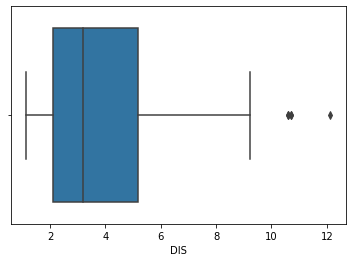

In [3]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

If you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis. As we do not have categorical value in our Boston Housing dataset, we might need to forget about using box plot for multivariate outlier analysis.

#### Scatter plot-

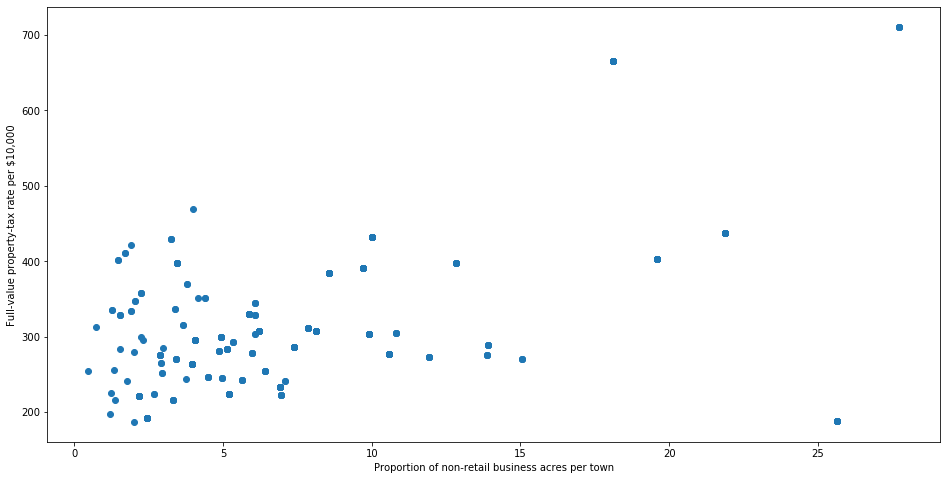

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

### Discover outliers with mathematical function
#### Z-Score-
While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [5]:
from scipy import stats

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [6]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [7]:
print(z[56][1])

3.1604409230624513


In [8]:
boston_df_o = boston_df[(z<3).all(axis=1)]

In [9]:
boston_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### IQR score

In [10]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [11]:
print((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

In [12]:
boston_df_o1 = boston_df[~((boston_df<(Q1-1.5*IQR))|(boston_df>(Q3+1.5*IQR)))]

In [13]:
boston_df_o1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Outlier Removal Clustering

Outlier Removal Clustering (ORC) is a improved version of KMean with outlier removal in each iteration. As we all know that KMean is more sensitive with outliers, and might result into local optimal centroids. For data which has lot of outliers still works well with KMean if we add outlier removal mechanism in each iteration of the KMean clustering. This will ensure the centroid calculation won't be skewed by the points far away from the cluster centroid.

Due to the anomalies around the cluster the cluster centroids are bit deviated to accommodate these points.

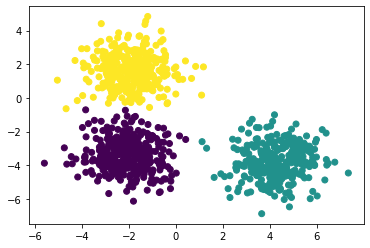

In [14]:
# Generate data
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000,
                 n_features=2,
                 centers=3,
                 center_box=(-5,5))

plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.show()

In [15]:
# save data to csv
_d = pd.DataFrame(X)
_d.columns = ['x', 'y']
_d.to_csv('./2d-cluster-new.csv')
df = pd.read_csv("2d-cluster-new.csv", index_col=0)
df.describe()

,x,y
count,1000.000000,1000.000000
mean,0.084340,-1.864009
std,3.103760,2.667092
min,-5.599064,-6.882346
25%,-2.300016,-3.985331
50%,-1.365315,-2.900773
75%,3.629506,0.949244
max,7.337560,4.834019


<Figure size 432x288 with 0 Axes>

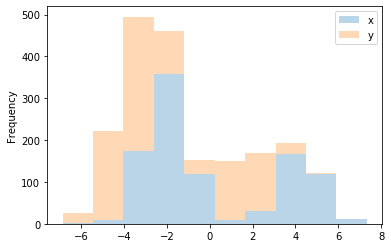

In [16]:
df1 = pd.DataFrame({'x':df.x, 'y':df.y}, columns=['x','y'])
plt.figure()
df1.plot.hist(alpha=0.3, stacked=True, bins=10)

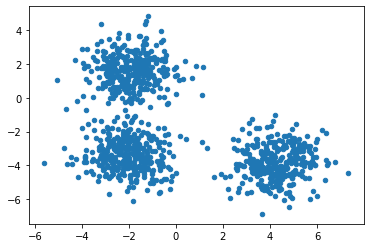

In [17]:
plt.scatter(df.x, df.y, s=20)

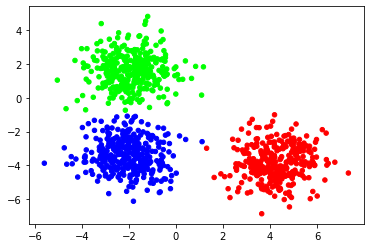

In [18]:
# Cluster the points with KMean
from sklearn.cluster import KMeans
import numpy as np

model = KMeans(n_clusters=3, max_iter=300)
model.fit(df)

colormap = np.array(['red', 'lime', 'blue'])
plt.scatter(df.x, df.y, c=colormap[model.labels_], s=20)

KMean iterations are giving consistent centroid selection. But it's pretty clear that due to the anomalies around the cluster the cluster centroids are bit deviated to accommodate these points. On the plot it's clear that, we can remove it out still we will get the same cluster with more clear boundaries.

The method has following steps:-

1. Do KMean with fixed number of iterations.
2. Then calculate the farthest point in each cluster from step 1.
3. For each point in a cluster calculate the outlier ratio, by finding distance between centroid and the point and normalize it with the distance of the farthest point. We are normalizing it to ensure the distance from 0 to 1.
4. Set a threshold distance, T=0.9, all points with distance more than this is considered anomaly.
5. Repeat from step 1, Till we removed enough anomalies from our data.

Setting T<1 ensures at least one data vector will be removed each time as part of anomaly removal step, so we need to tune T, as well as number of iteration to ensure we aren't trimming actual cluster data vectors.

In [19]:
from collections import defaultdict
import math
from sklearn.cluster import KMeans

#cluster size
K=3
MAX_ITER=100

#List of clusters wuth its points init
CLUSTERS = defaultdict(list)

#Kmean model
model = KMeans(n_clusters=K, max_iter=MAX_ITER)

# Anomoly threshold; tune it to avoid over/under fitting
T=0.95

#load dataframe
df = pd.read_csv('2d-cluster-new.csv', index_col=0)

def distance(x, y):
    """
    Find distance between two points in a plain.
    @param x: 2D point.
    @param y: 2D point.
    
    @return euclidean distance between this point.
    """
    d1 = x[0]-y[0]
    d2 = x[1]-y[1]
    distance = math.sqrt(d1*d1 + d2*d2)
    return distance

def print_cluster_details(clusters, centroids):
    for index, cluster in clusters.items():
        print("Cluster: {}, Size: {}".format(index, len(cluster)))
        
def aggregate_cluster_points(df, labels):
    """
    Helper methods to aggregate the cluster points based on the label index.
    
    @param df: List of points or datapoints
    @param labels: Cluster index list for each element in points.

    @retrun List of cluster points, indexed with cluster index.
    """
    clusters = defaultdict(list)
    
    for index, value in enumerate(labels):
        clusters[value].append(df.values[index])
    
    return clusters

def dump_cluster_points(df, labels):
    """
    @param clusters: dataframe
    
    Dump ponts of the cluster in csv file named as cluster_{#index}.csv
    """
    clusters = aggregate_cluster_points(df, labels)
    
    for index, cluster in clusters.items():
        with open("cluster_{}.csv".format(index), 'w') as f:
            f.write("\n".join(["{},{}".format(p[0],p[1]) for p in cluster]))
            
            
def get_outliers_and_strip_cluster(cluster_points, centroid):
    """
    Apply ODIN algorithm to identify anomalies in the cluster and
    strip it.
    
    Anomaly detection rule:- 
    
    sqrt(point^2 - centroid^2) / max(points) > T === True then it's an anomaly.
    
    @param cluster_points: List of points in this cluster.
    @param centroid: centroid of the cluster.
    @return: outliers, new_cluster
    """
    d_vector = np.array([distance(point, centroid) for point in cluster_points])
    d_max = d_vector.max()
    data = pd.DataFrame([distance(point, centroid)/d_max for point in cluster_points])
    
    outliers = filter(lambda row:distance(centroid, row)/d_max > T, cluster_points)
    new_clusters = filter(lambda row:distance(centroid, row)/d_max <= T, cluster_points)
    return outliers, new_clusters


def run_outlier_removal_clustering(df, max_iteration):
    """
    Run ORC Outlier removal clustering on the datapoints.
    
    Clustering Algorithm - KMean
    Outlier removal Algorithm - ODIN a Knn based outlier detection.
    """
    orc_model = KMeans(n_clusters=K, max_iter=MAX_ITER)
    OUTLIERS=[]
    for iteration in range(max_iteration):
        orc_model.fit(df)
        labels = orc_model.labels_
        
        CLUSTER = aggregate_cluster_points(df, labels)
        centroids = orc_model.cluster_centers_
        
        NEW_CLUSTER = []
        for index, cluster in CLUSTER.items():
            outlier, new_cluster = get_outliers_and_strip_cluster(cluster, centroids[index])
            OUTLIERS.extend(outlier)
            NEW_CLUSTER.extend(new_cluster)
            
        #Update cluster with new cluster
        df = pd.DataFrame(data=NEW_CLUSTER)
        
    # Fit for the one more time, as the when loop exists we removed few anomolies.
    orc_model.fit(df)
    
    return df, orc_model, OUTLIERS

In [20]:
# run outlier removal clustering
df, orc_model, outliers = run_outlier_removal_clustering(df, 5)

print_cluster_details(aggregate_cluster_points(df, orc_model.labels_), orc_model.cluster_centers_)

Cluster: 1, Size: 307
Cluster: 2, Size: 315
Cluster: 0, Size: 322


In [21]:
print("Total anomalies: {}".format(len(outliers)))
print("Exported the cluster and anomalies into csv files")
dump_cluster_points(df, orc_model.labels_)

with open('anomalies.csv', 'w') as f:
    f.write("\n".join(["{}, {}".format(p[0],p[1]) for p in outliers]))

Total anomalies: 56
Exported the cluster and anomalies into csv files


Text(0.5, 1.0, 'ORC Clustering')

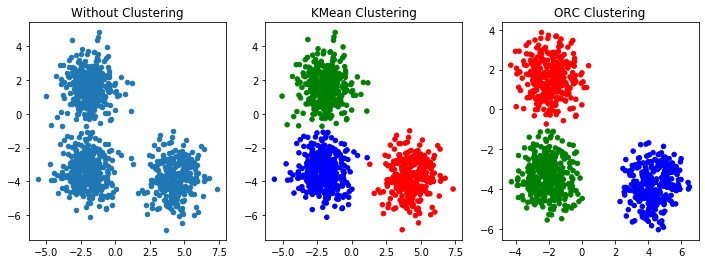

In [22]:
# Plot the Original and new cluster after anomaly removal.
plt.figure(figsize=(12,4))
colormap=np.array(['red','blue','green','yellow','lime'])
df.columns=['x','y']

data = pd.read_csv('2d-cluster-new.csv', index_col=0)
plt.subplot(1,3,1)
plt.scatter(data.x, data.y, s=20)
plt.title("Without Clustering")

_kmean=model.fit(data)
plt.subplot(1,3,2)
plt.scatter(data.x, data.y, c=colormap[_kmean.labels_], s=20)
plt.title("KMean Clustering")

plt.subplot(1,3,3)
plt.scatter(df.x, df.y, c=colormap[orc_model.labels_], s=20)
plt.title("ORC Clustering")

# Missing Values

There are 3 major types of missing values to be concerned about.
##### * Missing Completely at Random (MCAR): There is no effect of MCAR on inferences made by a model trained on such data.
##### * Missing at Random (MAR): MARs are handled by using the information in the other predictors to build a model and impute a value for the missing entry.
##### * Missing Not at Random (MNAR): The probability of missing values, not at random, depends on information that has not been recorded. MNARs are almost impossible to handle. Luckily there shouldn’t be any effect of MNAR on inferences made by a model trained on such data.

### Different approaches to imputing missing values

1. Imputation using zero, mean, median or most frequent value. Additionally, we can create a new variable that is an indicator of missingness and includes it in the model to predict the response. This is done after plugging in zero, mean, median, or most frequent value in the actual variable.

2. Imputation using a randomly selected value

3. Imputation with a model: The k nearest neighbor algorithm is often used to impute a missing value based on how closely it resembles the points in the training set. We choose kNN in order to capture the variability of available data. This would not be the case if we would use a linear regression model that would predict missing values along a regression line.

4. The imputed data can be optionally standardized between 0 and 1. This might improve the performance of classification.


In [23]:
import pandas as pd
pima = pd.read_csv('pima-indians-diabetes.csv')

response = 'Outcome'
predictors = pima.columns.difference([response]).values

pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,120.922775,69.111257,20.537958,80.070681,31.998429,0.472712,33.248691
std,3.374327,32.039835,19.403339,15.970234,115.431087,7.899591,0.331981,11.771901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [24]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In terms of missing data, the variables we need to look at most closely are Glucose, BloodPressure, SkinThickness, Insulin, and BMI, all of which contain 0 among their observations.
A quick search in the literature shows that these features cannot have a physiological value of zero. The most plausible explanation is that missing observations for features were missing were somehow replaced with zero.

This disguised missing data would mislead our later classification attempts. We will clean the data by marking disguised missing values clearly as NaN.

In [26]:
def clean_data(df_raw,
               cols_with_zeros=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], 
               response = ['Outcome']):
    df = df_raw.copy()
    # replace zero with NaN in features
    df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
    # remove \ and } from response
    df = df.replace(to_replace=r'\\|\}', value='', regex=True)
    # change response data type to int
    df[response] = df[response].astype('int')
    return df
  
pima_df_cleaned = clean_data(pima)
pima_df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
print("Proportion of missing values")
missing_values_count = pima_df_cleaned.isna().sum()*100/pima_df_cleaned.shape[0]
features_with_missing_values = missing_values_count[missing_values_count>0].index.values
missing_values_count

Proportion of missing values


Pregnancies                  0.000000
Glucose                      0.654450
BloodPressure                4.581152
SkinThickness               29.581152
Insulin                     48.560209
BMI                          1.439791
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

By looking closer, it seems that missing values for SkinThickness are correlated with missing values for Insulin. When SkinThickness is missing, then Insulin is also missing.

Furthermore, when BloodPressure or BMI is missing, then the probability is higher that Insulin or SkinThickness values will be missing as well.

In [28]:
pima[(pima.SkinThickness==0) & (pima.Insulin!=0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [29]:
pima_df_cleaned[pima_df_cleaned.Insulin.isna()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# function for KNN model-based imputation of missing values using features without NaN as predictors
def impute_model_basic(df):
    cols_nan = df.columns[df.isna().any()].tolist()
    cols_no_nan = df.columns.difference(cols_nan).values
    for col in cols_nan:
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
    return df

# function for KNN model-based imputation of missing values using features without NaN as predictors, 
# including progressively added imputed features
def impute_model_progressive(df):
    cols_nan = df.columns[df.isna().any()].tolist()    
    cols_no_nan = df.columns.difference(cols_nan).values            
    while len(cols_nan)>0:
        col = cols_nan[0]
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
        cols_nan = df.columns[df.isna().any()].tolist()    
        cols_no_nan = df.columns.difference(cols_nan).values
    return df


#  function for imputing missing data according to a given impute_strategy:
#  drop_rows: drop all rows with one or more missing values
#  drop_cols: drop columns with one or more missing values
#  model_basic: KNN-model-based imputation with fixed predictors
#  model_progressive: KNN-model-based imputation with progressively added predictors
#  mean, median, most_frequent: imputation with mean, median or most frequent values
#
#  cols_to_standardize: if provided, the specified columns are scaled between 0 and 1, after imputation

def impute_data(df_cleaned, impute_strategy=None, cols_to_standardize=None):
    df = df_cleaned.copy()
    if impute_strategy == 'drop_rows':
        df = df.dropna(axis=0)
    elif impute_strategy == 'drop_cols':
        df = df.dropna(axis=1)
    elif impute_strategy == 'model_basic':
        df = impute_model_basic(df)
    elif impute_strategy == 'model_progressive':
        df = impute_model_progressive(df) 
    else:
        arr = SimpleImputer(missing_values=np.nan,strategy=impute_strategy).fit(
          df.values).transform(df.values)
        df = pd.DataFrame(data=arr, index=df.index.values, columns=df.columns.values)
    if cols_to_standardize != None:
        cols_to_standardize = list(set(cols_to_standardize) & set(df.columns.values))
        df[cols_to_standardize] = df[cols_to_standardize].astype('float')
        df[cols_to_standardize] = pd.DataFrame(data=MinMaxScaler().fit(
          df[cols_to_standardize]).transform(df[cols_to_standardize]), 
                                             index=df[cols_to_standardize].index.values,
                                             columns=df[cols_to_standardize].columns.values)
    return df

### Logistic regression with missing data
In this section, we fit a logistic regression model on the cleaned data after applying a specific imputation strategy:
* dropping rows with missing values,
* dropping columns with missing values,
* imputing missing values with column mean,
* imputing missing values with model-based prediction,
* imputing missing values with progressive model-based prediction.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

# function for handling missing values 
# and fitting logistic regression on clean data
def logistic_regression(data, impute_strategy=None,
                        cols_to_standardize=None,
                        test_size=0.25,
                        random_state=9001):
    start = timer()
    
    # store original columns
    original_columns = data.columns.difference(['Outcome'])
    df_imputed = impute_data(data, impute_strategy, cols_to_standardize)
    train_data, test_data = train_test_split(df_imputed, test_size=test_size,
                                             random_state=random_state)
    
    # note which predictor columns were dropped or kept
    kept_columns = df_imputed.columns.difference(['Outcome'])
    dropped_columns = original_columns.difference(df_imputed.columns)
    original_columns = original_columns.difference(['Outcome'])
    
    # prepare tensors
    X_train = train_data.drop(columns=['Outcome'])
    y_train = train_data['Outcome']
    X_test = test_data.drop(columns=['Outcome'])
    y_test = test_data['Outcome']
    
    # model training
    logistic_model = LogisticRegressionCV(cv=10, penalty='l2', max_iter=1000).fit(
        X_train, y_train)
    
    # model evaluation
    train_score = accuracy_score(y_train, logistic_model.predict(X_train))
    test_score = accuracy_score(y_test, logistic_model.predict(X_test))
    duration = timer() - start
    print("Classification rate on training data: {}".format(train_score))
    print("Classification rate on test data: {}".format(test_score))
    print("Execution time: {}".format(duration))
    
    return {
        'imputation strategy': impute_strategy,
        'standardized': cols_to_standardize!=None,
        'model': logistic_model,
        'train score': train_score,
        'test score': test_score,
        'execution time (s)': duration
    }
  
# list to store models' performance  
lr_results = []

# prepare data
pima_df_cleaned = clean_data(pima)
cols_to_standardize=['Age','BMI','BloodPressure','Glucose','Insulin','Pregnancies','SkinThickness','DiabetesPedigreeFunction']

# fit logistic regression for each imputation strategy
# with and without standardizing features
for impute_strategy in ['drop_rows', 'mean', 'model_basic', 'model_progressive']:
    for cols in [None, cols_to_standardize]:
        result = logistic_regression(pima_df_cleaned, impute_strategy=impute_strategy, cols_to_standardize=cols)
        lr_results.append(result)

# display logistic regression performance
lr_results_df = pd.DataFrame(lr_results)
lr_results_df.drop(['model'], axis=1).drop_duplicates()

Classification rate on training data: 0.8225255972696246
Classification rate on test data: 0.7040816326530612
Execution time: 1.188914699999998
Classification rate on training data: 0.825938566552901
Classification rate on test data: 0.6938775510204082
Execution time: 0.2840120000000006
Classification rate on training data: 0.7731239092495636
Classification rate on test data: 0.7591623036649214
Execution time: 1.1146755000000006
Classification rate on training data: 0.7661431064572426
Classification rate on test data: 0.7591623036649214
Execution time: 0.2750553999999994
Classification rate on training data: 0.7696335078534031
Classification rate on test data: 0.7801047120418848
Execution time: 1.1940430999999982
Classification rate on training data: 0.7713787085514834
Classification rate on test data: 0.774869109947644
Execution time: 0.3093494000000021
Classification rate on training data: 0.7801047120418848
Classification rate on test data: 0.7696335078534031
Execution time: 1.20297

,execution time (s),imputation strategy,standardized,test score,train score
0,1.188915,drop_rows,False,0.704082,0.822526
1,0.284012,drop_rows,True,0.693878,0.825939
2,1.114676,mean,False,0.759162,0.773124
3,0.275055,mean,True,0.759162,0.766143
4,1.194043,model_basic,False,0.780105,0.769634
5,0.309349,model_basic,True,0.774869,0.771379
6,1.202971,model_progressive,False,0.769634,0.780105
7,0.321471,model_progressive,True,0.764398,0.787086


## Effect of imputation on inference
We retrieve the coefficients estimated by our regularized logistic regression models as follows.

In [32]:
# get index of strategies
lr_results_df = pd.DataFrame(lr_results)
strategies = lr_results_df['imputation strategy']

# get a boolean array where True => standardized
standardized = lr_results_df['standardized']
st = lambda s: ' standardized' if s else ''
coefs_ = {}
for key, value in enumerate(strategies):
    if value == 'drop_cols':
        # skip
        pass
    else:
        strategy = value + st(standardized[key])
        coefs_[strategy] = lr_results_df['model'][key].coef_[0]

coef_df = pd.DataFrame(data=coefs_, index=predictors)
coef_df.T

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
drop_rows,0.042555,0.045116,0.005880,-0.001441,-0.002133,0.082580,0.884637,0.031679
drop_rows standardized,0.735836,6.392153,0.557034,-0.077534,-1.753578,4.024592,2.227690,1.886384
mean,0.153093,0.039195,-0.010453,-0.008178,-0.000731,0.103872,1.004567,0.015207
mean standardized,2.518595,5.928161,-0.840922,-0.511167,-0.451331,4.821429,2.281098,0.915101
model_basic,0.149659,0.038547,-0.008295,0.000338,-0.000328,0.096011,0.949271,0.014574
model_basic standardized,2.544475,5.990200,-0.754568,0.053903,-0.275382,4.704462,2.339150,0.885368
model_progressive,0.151428,0.041181,-0.012843,-0.000461,-0.001398,0.101778,0.964911,0.015623
model_progressive standardized,2.584038,6.419168,-1.223196,-0.042236,-1.187678,5.013827,2.384934,0.948373


The following table compares the effect of mean imputation and model-based imputation on the coefficient magnitude obtained after dropping rows with missing data.

In [33]:
coef_perc_df = coef_df.copy()
cols = coef_df.columns.difference(['drop_rows']).values
for col in cols:
    coef_perc_df[col] = np.round(100*(coef_df[col]/coef_df['drop_rows']-1))
coef_perc_df[['drop_rows','mean','model_basic','model_progressive']]

,drop_rows,mean,model_basic,model_progressive
Age,0.042555,260.0,252.0,256.0
BMI,0.045116,-13.0,-15.0,-9.0
BloodPressure,0.005880,-278.0,-241.0,-318.0
DiabetesPedigreeFunction,-0.001441,468.0,-123.0,-68.0
Glucose,-0.002133,-66.0,-85.0,-34.0
Insulin,0.082580,26.0,16.0,23.0
Pregnancies,0.884637,14.0,7.0,9.0
SkinThickness,0.031679,-52.0,-54.0,-51.0
